In [2]:
%matplotlib inline
from preamble import *


#  INT303 Big Data Analytics


##  Lab 7 Supervised Learning

**XJTLU**<br>
**S1 2021**<br>
**Instructors:** Jia WANG <br>
**Lab Instructor:** Jia WANG <br>


**Outline** 
* Introduction to Linear Regression
* Introduction to KNN
* Introduction to Decision Tree


**Applications** 
* Wine Classification
* Sales Performance Prediction
* vehicle prices Prediction
* Titanic survival state classification


# KNN Classification using Scikit-learn
## Learn K-Nearest Neighbor(KNN) Classification and build KNN classifier using Python Scikit-learn package.

K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. In political science, classifying potential voters in two classes will vote or won’t vote. KNN algorithm used for both classification and regression problems. KNN algorithm based on feature similarity approach.

## K-Nearest Neighbors
![title](img/knn.jpg "ShowMyImage")
KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

## How does the KNN algorithm work?

In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.

![title](img/knn_graph.png "ShowMyImage")

Suppose P1 is the point, for which label needs to predict. First, you find the k closest point to P1 and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:

- 1) Calculate distance
- 2) Find closest neighbors
- 3) Vote for labels

![title](img/knn_steps.png "ShowMyImage")


## Curse of Dimensionality

KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.
To deal with the problem of the curse of dimensionality, you need to perform principal component analysis before applying any machine learning algorithm, or you can also use feature selection approach. Research has shown that in large dimension Euclidean distance is not useful anymore. Therefore, you can prefer other measures such as cosine similarity, which get decidedly less affected by high dimension.

## How do you decide the number of neighbors in KNN?

Now, you understand the KNN algorithm working mechanism. At this point, the question arises that How to choose the optimal number of neighbors? And what are its effects on the classifier? The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.
Research has shown that no optimal number of neighbors suits all kind of data sets. Each dataset has it's own requirements. In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.
Generally, Data scientists choose as an odd number if the number of classes is even. You can also check by generating the model on different values of k and check their performance. You can also try Elbow method here.

## Classifier  Building in Scikit-learn

### KNN Classifier

#### Defining dataset

Let's first create your own dataset. Here you need two kinds of attributes or columns in your data: Feature and label. The reason for two type of column is "supervised nature of KNN algorithm".

In [5]:
# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In this dataset, you have two features (weather and temperature) and one label(play).

#### Encoding data columns

Various machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.
In order to encode this data, you could map each value to a number. e.g. Overcast:0, Rainy:1, and Sunny:2.
This process is known as label encoding, and sklearn conveniently will do this for you using Label Encoder.

In [7]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)

print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


Here, you imported preprocessing module and created Label Encoder object. Using this LabelEncoder object, you can fit and transform "weather" column into the numeric column.
Similarly, you can encode temperature and label into numeric columns.

In [8]:
# converting string labels into numbers

temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

#### Combining Features

Here, you will combine multiple columns or features into a single set of data using "zip" function

In [10]:
#combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))

#### Generating Model

Let's build KNN classifier model.
First, import the KNeighborsClassifier module and create KNN classifier object by passing argument number of neighbors in KNeighborsClassifier() function.
Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print(predicted)

[1]


In the above example, you have given input [0,2], where 0 means Overcast weather and 2 means Mild temperature. Model predicts [1], which means play.

#### KNN with Multiple Labels

Till now, you have learned How to create KNN classifier for two in python using scikit-learn. Now you will learn about KNN with multiple classes.
In the model the building part, you can use the wine dataset, which is a very famous multi-class classification problem. This data is the result of a chemical analysis of wines grown in the same region in Italy using three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
The dataset comprises 13 features ('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline') and a target (type of cultivars).
This data has three types of cultivar classes: 'class_0', 'class_1', and 'class_2'. Here, you can build a model to classify the type of cultivar. The dataset is available in the scikit-learn library, or you can also download it from the UCI Machine Learning Library.

#### Loading Data

Let's first load the required wine dataset from scikit-learn datasets.

In [12]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

#### Exploring Data

After you have loaded the dataset, you might want to know a little bit more about it. You can check feature and target names.

In [13]:
# print the names of the features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [14]:
# print the label species(class_0, class_1, class_2)
print(wine.target_names)

['class_0' 'class_1' 'class_2']


Let's check top 5 records of the feature set.


In [15]:
# print the wine data (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


Let's check records of the target set.

In [16]:
# print the wine labels (0:Class_0, 1:Class_1, 2:Class_3)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Let's explore it for a bit more. You can also check the shape of the dataset using shape.


In [17]:
# print data(feature)shape
print(wine.data.shape)

(178, 13)


In [18]:
# print target(or label)shape
print(wine.target.shape)

(178,)


#### Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.
Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [19]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
## 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) 

#### Generating Model for K=5

Let's build KNN classifier model for k=5.

In [20]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#### Model Evaluation for k=5

Let's estimate, how accurately the classifier or model can predict the type of cultivars.
Accuracy can be computed by comparing actual test set values and predicted values.

In [21]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7592592592592593


Well, you got a classification rate of more or less 70.00%, considered as good accuracy.
For further evaluation, you can also create a model for a different number of neighbors.

#### Re-generating Model for K=7

Let's build KNN classifier model for k=7.

In [22]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#### Model Evaluation for k=7

Let's again estimate, how accurately the classifier or model can predict the type of cultivars for k=7.

In [23]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778


Well, you got a classification rate of more or less 77.00%, considered as good accuracy.
Here, you have increased the number of neighbors in the model and accuracy got increased. But, this is not necessary for each case that an increase in many neighbors increases the accuracy. For a more detailed understanding of it, you can refer section "How to decide the number of neighbors?" of this tutorial.

## Pros

The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm. KNN can be useful in case of nonlinear data. It can be used with the regression problem. Output value for the object is computed by the average of k closest neighbors value.

## Cons

The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for large dimensional data.

## How to improve KNN?

For better results, normalizing data on the same scale is highly recommended. Generally, the normalization range considered between 0 and 1. KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance. Also, handling missing values will help us in improving results.

## Conclusion

Congratulations, you have made it to the end of this tutorial!
In this tutorial, you have learned the K-Nearest Neighbor algorithm; it's working, eager and lazy learner, the curse of dimensionality, model building and evaluation on wine dataset using Python Scikit-learn package. Also, discussed its advantages, disadvantages, and performance improvement suggestions.
I look forward to hearing any feedback or questions. You can ask questions by leaving a comment, and I will try my best to answer it.

#### Ref: https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

# Introduction to Linear Regression
## What Didn't We Cover?

- Detecting collinearity
- Diagnosing model fit
- Transforming predictors to fit non-linear relationships
- Interaction terms
- Assumptions of linear regression
- And so much more!



In [33]:
import pandas as pd
import matplotlib.pyplot as plt
# read data into a DataFrame
data = pd.read_csv('./data/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [34]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

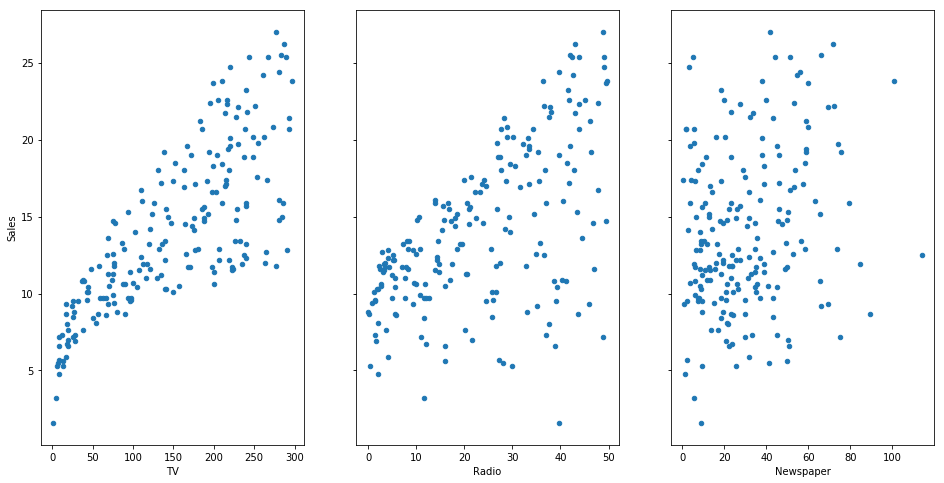

In [35]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="./img/08_estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="./img/08_slope_intercept.png">

Let's use **Statsmodels** to estimate the model coefficients for the advertising data:

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

<img src="./img/08_r_squared.png">

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). (Does the red line look like it's overfitting?)

Let's calculate the R-squared value for our simple linear model:

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

## Linear Regression in scikit-learn

Let's redo some of the Statsmodels code above in scikit-learn:

In [49]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [50]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

In [55]:
import numpy as np


# predict for a new observation
lm.predict(np.array([100, 25, 25]).reshape(1, -1))

array([12.20266701])

In [56]:
# calculate the R-squared
lm.score(X, y)

0.8972106381789521

Note that **p-values** and **confidence intervals** are not (easily) accessible through scikit-learn.

## Handling Categorical Predictors with Two Categories

Up to now, all of our predictors have been numeric. What if one of our predictors was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [57]:

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need to represent all data **numerically**. If the feature only has two categories, we can simply create a **dummy variable** that represents the categories as a binary value:

In [58]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the **IsLarge** predictor:

In [59]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
zip(feature_cols, lm.coef_)

How do we interpret the **IsLarge coefficient**? For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average **increase** in Sales of 57.42 widgets (as compared to a Small market, which is called the **baseline level**).

What if we had reversed the 0/1 coding and created the feature 'IsSmall' instead? The coefficient would be the same, except it would be **negative instead of positive**. As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient.

## Handling Categorical Predictors with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [60]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, we create **another dummy variable**:

In [61]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


Here is how we interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

Why do we only need **two dummy variables, not three?** Because two dummies captures all of the information about the Area feature, and implicitly defines rural as the baseline level. (In general, if you have a categorical feature with k levels, you create k-1 dummy variables.)

If this is confusing, think about why we only needed one dummy variable for Size (IsLarge), not two dummy variables (IsSmall and IsLarge).

Let's include the two new dummy variables in the model:

In [66]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
for i in zip(feature_cols, lm.coef_):
    print(i)

('TV', 0.04574401036331374)
('Radio', 0.18786669552525798)
('Newspaper', -0.0010876977267109122)
('IsLarge', 0.07739660749747915)
('Area_suburban', -0.10656299015958612)
('Area_urban', 0.26813802165220074)


How do we interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 268.13 widgets (as compared to rural).

**A final note about dummy encoding:** If you have categories that can be ranked (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can potentially use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).

## Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read my [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.
- To learn more about Statsmodels and how to interpret the output, DataRobot has some decent posts on [simple linear regression](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) and [multiple linear regression](http://www.datarobot.com/blog/multiple-regression-using-statsmodels/).
- This [introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) is much more detailed and mathematically thorough, and includes lots of good advice.
- This is a relatively quick post on the [assumptions of linear regression](http://pareonline.net/getvn.asp?n=2&v=8).

# Introduction to Decision Trees


## Regression trees

Let's look at a simple example to motivate our learning.

Our goal is to **predict a baseball player's Salary** based on **Years** (number of years playing in the major leagues) and **Hits** (number of hits he made in the previous year). Here is the training data, represented visually (low salary is blue/green, high salary is red/yellow):

<img src="./img/15_salary_color.png">

**How might you "stratify" or "segment" the feature space into regions, based on salary?** Intuitively, you want to **maximize** the similarity (or "homogeneity") within a given region, and **minimize** the similarity between different regions.

Below is a regression tree that has been fit to the data by a computer. (We will talk later about how the fitting algorithm actually works.) Note that  Salary is measured in thousands and has been log-transformed.

<img src="./img/15_salary_tree.png">

**How do we make Salary predictions (for out-of-sample data) using a decision tree?**

- Start at the top, and examine the first "splitting rule" (Years < 4.5).
- If the rule is True for a given player, follow the left branch. If the rule is False, follow the right branch.
- Continue until reaching the bottom. The predicted Salary is the number in that particular "bucket".
- *Side note:* Years and Hits are both integers, but the convention is to label these rules using the midpoint between adjacent values.

Examples predictions:

- Years=3, then predict 5.11 ($\$1000 \times e^{5.11} \approx \$166000$)
- Years=5 and Hits=100, then predict 6.00 ($\$1000 \times e^{6.00} \approx \$403000$)
- Years=8 and Hits=120, then predict 6.74 ($\$1000 \times e^{6.74} \approx \$846000$)

**How did we come up with the numbers at the bottom of the tree?** Each number is just the **mean Salary in the training data** of players who fit that criteria. Here's the same diagram as before, split into the three regions:

<img src="./img/15_salary_regions.png">

This diagram is essentially a combination of the two previous diagrams (except that the observations are no longer color-coded). In $R_1$, the mean log Salary was 5.11. In $R_2$, the mean log Salary was 6.00. In $R_3$, the mean log Salary was 6.74. Thus, those values are used to predict out-of-sample data.

Let's introduce some terminology:

<img src="./img/15_salary_tree_annotated.png">

**How might you interpret the "meaning" of this tree?**

- Years is the most important factor determining Salary, with a lower number of Years corresponding to a lower Salary.
- For a player with a lower number of Years, Hits is not an important factor determining Salary.
- For a player with a higher number of Years, Hits is an important factor determining Salary, with a greater number of Hits corresponding to a higher Salary.

What we have seen so far hints at the advantages and disadvantages of decision trees:

**Advantages:**

- Highly interpretable
- Can be displayed graphically
- Prediction is fast

**Disadvantages:**

- Predictive accuracy is not as high as some supervised learning methods
- Can easily overfit the training data (high variance)

## Building a regression tree by hand

How do you build a decision tree? You're going to find out by building one in pairs!

Your training data is a tiny dataset of [used vehicle sale prices](https://raw.githubusercontent.com/justmarkham/DAT4/master/data/used_vehicles.csv). Your goal is to predict Price for out-of-sample data. Here are your instructions:

- Read the data into Pandas.
- Explore the data by sorting, plotting, or split-apply-combine (aka `group_by`).
- Decide which feature is the most important predictor, and use that to make your first split. (Only binary splits are allowed!)
- After making your first split, you should actually split your data in Pandas into two parts, and then explore each part to figure out what other splits to make.
- Stop making splits once you are convinced that it strikes a good balance between underfitting and overfitting. (As always, your goal is to build a model that generalizes well!)
- You are allowed to split on the same variable multiple times!
- Draw your tree, making sure to label your leaves with the mean Price for the observations in that "bucket".
- When you're finished, review your tree to make sure nothing is backwards. (Remember: follow the left branch if the rule is true, and follow the right branch if the rule is false.)

## How does a computer build a regression tree?

The ideal approach would be for the computer to consider every possible partition of the feature space. However, this is computationally infeasible, so instead an approach is used called **recursive binary splitting:**

- Begin at the top of the tree.
- For every single predictor, examine every possible cutpoint, and choose the predictor and cutpoint such that the resulting tree has the **lowest possible mean squared error (MSE)**. Make that split.
- Repeat the examination for the two resulting regions, and again make a single split (in one of the regions) to minimize the MSE.
- Keep repeating this process until a stopping criteria is met.

**How does it know when to stop?**

1. We could define a stopping criterion, such as a **maximum depth** of the tree or the **minimum number of samples in the leaf**.
2. We could grow the tree deep, and then "prune" it back using a method such as "cost complexity pruning" (aka "weakest link pruning").

Method 2 involves setting a tuning parameter that penalizes the tree for having too many leaves. As the parameter is increased, branches automatically get pruned from the tree, resulting in smaller and smaller trees. The tuning parameter can be selected through cross-validation.

Note: **Method 2 is not currently supported by scikit-learn**, and so we will use Method 1 instead.

Here's an example of an **unpruned tree**, and a comparison of the training, test, and cross-validation errors for trees with different numbers of leaves:

<img src="./img/15_salary_unpruned.png">

As you can see, the **training error** continues to go down as the tree size increases, but the lowest **cross-validation error** occurs for a tree with 3 leaves.

## Building a regression tree in scikit-learn

In [118]:
# import pandas
import pandas as pd

# read in vehicle data
vehicles = pd.read_csv('./data/used_vehicles.csv')

# print out data
vehicles

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car
5,4000,2006,124000,2,car
6,3000,2004,177000,4,car
7,2000,2004,209000,4,truck
8,3000,2003,138000,2,car
9,1900,2003,160000,4,car


In [69]:
# convert car to 0 and truck to 1
vehicles['type'] = vehicles.type.map({'car':0, 'truck':1})

In [70]:
# select feature columns (every column except for the 0th column)
feature_cols = vehicles.columns[1:]

# define X (features) and y (response)
X = vehicles[feature_cols]
y = vehicles.price

In [73]:
# split into train/test
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [75]:
# print out each of the arrays
print (X_train)
print (y_train)
print (X_test)
print (y_test)

    year   miles  doors  type
10  2003  190000      2     1
4   2007   47000      4     0
1   2010   30000      2     0
12  1999  163000      2     1
0   2012   13000      2     0
13  1997  138000      4     0
9   2003  160000      4     0
8   2003  138000      2     0
11  2001   62000      4     0
5   2006  124000      2     0
10     2500
4      9000
1     14000
12     1800
0     22000
13     1300
9      1900
8      3000
11     5000
5      4000
Name: price, dtype: int64
   year   miles  doors  type
3  2009   78000      4     0
7  2004  209000      4     1
6  2004  177000      4     0
2  2010   73500      4     0
3     9500
7     2000
6     3000
2    13000
Name: price, dtype: int64


In [76]:
# import class, instantiate estimator, fit with training set
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [78]:
# make predictions
preds = treereg.predict(X_test)

# print predictions and actual values
print (preds)
print (y_test)

[5000. 1900. 1900. 5000.]
3     9500
7     2000
6     3000
2    13000
Name: price, dtype: int64


In [79]:
# print RMSE
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, preds))

4622.4993239588475

In [119]:
# use cross-validation to find best max_depth
from sklearn.model_selection import cross_val_score

In [120]:
# try max_depth=2
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(scores))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


nan

In [121]:
# try max_depth=3
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4592.155425575525

In [122]:
# try max_depth=4
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4704.005269479739

In [123]:
# max_depth=3 was best, so fit a tree using that parameter with ALL DATA
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [98]:
# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,type,0.000000


In [110]:
# create a Graphviz file
#from sklearn.tree import export_graphviz
#with open("./img/15_vehicles.dot", 'wb') as f:
    #f = export_graphviz(treereg, out_file=f, feature_names=feature_cols)
# at the command line, run this to convert to PNG:
#dot -Tpng 15_vehicles.dot -o 15_vehicles.png

<img src="./img/15_vehicles.png">

## Interpreting a tree diagram

How do we read this decision tree?

**Internal nodes:**

- "samples" is the number of observations in that node before splitting
- "mse" is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- first line is the condition used to split that node (go left if true, go right if false)

**Leaves:**

- "samples" is the number of observations in that node
- "value" is the mean response value in that node
- "mse" is the mean squared error calculated by comparing the actual response values in that node against "value"

## Predicting for out-of-sample data

How accurate is scikit-learn's regression tree at predicting the out-of-sample data?

In [112]:
# read in out-of-sample data
oos = pd.read_csv('./data/used_vehicles_oos.csv')

# convert car to 0 and truck to 1
oos['type'] = oos.type.map({'car':0, 'truck':1})

# print data
oos

,price,year,miles,doors,type
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [113]:
# define X and y
X_oos = oos[feature_cols]
y_oos = oos.price

In [115]:
# make predictions on out-of-sample data
preds = treereg.predict(X_oos)

# print predictions and actual values
print (preds)
print (y_oos.values)

[ 4000.  5000. 13500.]
[ 3000  6000 12000]


In [116]:
# print RMSE
np.sqrt(metrics.mean_squared_error(y_oos, preds))

1190.2380714238084

In [117]:
# print RMSE for the tree you created!
your_preds = [4000, 5000, 13500]
np.sqrt(metrics.mean_squared_error(y_oos, your_preds))

1190.2380714238084

## Classification trees

Classification trees are very similar to regression trees. Here is a quick comparison:

|regression trees|classification trees|
|---|---|
|predict a continuous response|predict a categorical response|
|predict using mean response of each leaf|predict using most commonly occuring class of each leaf|
|splits are chosen to minimize MSE|splits are chosen to minimize a different criterion (discussed below)|

Note that classification trees easily handle **more than two response classes**! (How have other classification models we've seen handled this scenario?)

Here's an **example of a classification tree**, which predicts whether or not a patient who presented with chest pain has heart disease:

<img src="./img/15_heart_tree.png">

## Splitting criteria for classification trees

Here are common options for the splitting criteria:

- **classification error rate:** fraction of training observations in a region that don't belong to the most common class
- **Gini index:** measure of total variance across classes in a region
- **cross-entropy:** numerically similar to Gini index, but uses logarithms

Which to use?

- When growing a tree, Gini index and cross-entropy are better measures of "node purity" than classification error rate. The Gini index is faster to compute than cross-entropy, so it is generally preferred (and is used by scikit-learn by default).
- When pruning a tree, classification error rate is preferable in order to maximize predictive accuracy.

Why do some splits result in leaves with the same predicted class?

- The split was performed to increase node purity, even though it didn't reduce the classification error.
- Node purity is important because we're interested in the class proportions among the observations in each region.

## Handling categorical predictors

Some implementations of classification trees will allow you to handle categorical predictors **without creating dummy variables**. When splitting on a categorical predictor, they will try splitting on **every possible combination of categories** to find the best split. In the example above, "ChestPain:bc" means that the left-hand branch consists of observations with the second and third ChestPain categories, and the right-hand branch consists of remaining observations.

**Unfortunately, scikit-learn's classification tree implementation does not support this approach.** Instead, here's how you can handle categorical predictors:

- If a predictor only has **two possible values**, code it as a single binary variable (0 or 1). Since it's treated as a number, splits will naturally occur at 0.5.
- If a predictor has **three or more possible values that are ordered**, code it as a single variable (1, 2, 3, etc). Splits will naturally occur at 1.5, 2.5, etc.
- If a predictor has **three or more possible values that are unordered**, create dummy variables and drop one level as usual. The decision tree won't know that the dummy variables are related to one another, but that shouldn't matter in terms of predictive accuracy.
- If a predictor has **thousands of possible unordered values**, then it may be best to code it as a single variable (1, 2, 3, etc) instead of using dummy variables to minimize the size of the resulting model. ([reference](http://stackoverflow.com/a/18736132/1636598))

We'll see examples of these strategies below.

## Building a classification tree in scikit-learn

We'll build a classification tree using the [Titanic data](https://www.kaggle.com/c/titanic-gettingStarted/data) provided by Kaggle.

In [126]:
# read in the data
titanic = pd.read_csv('./data/titanic.csv')
titanic.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [127]:
# look for missing values
titanic.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

Let's choose our response and a few features, and decide whether we need to adjust them:

- **survived:** This is our response, and is already encoded as 0=died and 1=survived.
- **pclass:** These are the passenger class categories (1=first class, 2=second class, 3=third class). They are ordered, so we'll leave them as-is.
- **sex:** This is a binary category, so we should encode as 0=female and 1=male.
- **age:** We need to fill in the missing values.
- **embarked:** This is the port they emarked from. There are three unordered categories, so we'll create dummy variables.

In [128]:
# encode sex feature
titanic['sex'] = titanic.sex.map({'female':0, 'male':1})

# fill in missing values for age
titanic.age.fillna(titanic.age.mean(), inplace=True)

# print the updated DataFrame
titanic.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C


In [129]:
# create three dummy variables using get_dummies
pd.get_dummies(titanic.embarked, prefix='embarked').head(10)

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [130]:
# create three dummy variables, drop the first dummy variable, and store this as a DataFrame
embarked_dummies = pd.get_dummies(titanic.embarked, prefix='embarked').iloc[:, 1:]

# concatenate the two dummy variable columns onto the original DataFrame
# note: axis=0 means rows, axis=1 means columns
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# print the updated DataFrame
titanic.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,embarked_Q,embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,0,1
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,0,1
5,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q,1,0
6,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C,0,0


In [131]:
# create a list of feature columns
feature_cols = ['pclass', 'sex', 'age', 'embarked_Q', 'embarked_S']

# define X and y
X = titanic[feature_cols]
y = titanic.survived

In [132]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [135]:
# create a Graphviz file
#with open("15_titanic.dot", 'wb') as f:
#    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols)

<img src="./img/15_titanic.png">

Notice the split in the bottom right, which was made only to increase node purity.

In [134]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,pclass,0.242664
1,sex,0.655584
2,age,0.064494
3,embarked_Q,0.000000
4,embarked_S,0.037258


## Wrapping up decision trees

Here are some advantages and disadvantages of decision trees that we haven't yet talked about:

**Advantages:**

- Can be specified as a series of rules, and are thought to more closely approximate human decision-making than other models
- Non-parametric (will do better than linear regression if relationship between predictors and response is highly non-linear)

<img src="./img/15_linear_vs_tree.png">

**Disadvantages:**

- Small variations in the data can result in a completely different tree
- Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree
- Can create biased trees if the classes are highly imbalanced

Note that there is not just one decision tree algorithm; instead, there are many variations. A few common decision tree algorithms that are often referred to by name are C4.5, C5.0, and CART. (More details are available in the [scikit-learn documentation](http://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart).) scikit-learn uses an "optimized version" of CART.

## Resources

- scikit-learn documentation: [Decision Trees](http://scikit-learn.org/stable/modules/tree.html)